In [1]:
#pip install mysql-connector-python pandas
#pip install seaborn

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="sprint4"
)

df_company = pd.read_sql("SELECT * FROM company", conexion)
df_credit_card = pd.read_sql("SELECT * FROM credit_card", conexion)
df_transaction = pd.read_sql("SELECT * FROM transaction", conexion)
df_product = pd.read_sql("SELECT * FROM product", conexion)
df_user = pd.read_sql("SELECT * FROM user", conexion)

print("transaction head:")
print(df_transaction.head())
print("\nuser head:")
print(df_user.head())

conexion.close()

C:\Users\barce\AppData\Local\Temp\ipykernel_14992\1413385747.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_company = pd.read_sql("SELECT * FROM company", conexion)
C:\Users\barce\AppData\Local\Temp\ipykernel_14992\1413385747.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_credit_card = pd.read_sql("SELECT * FROM credit_card", conexion)
C:\Users\barce\AppData\Local\Temp\ipykernel_14992\1413385747.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transaction = pd.read_sql("SELECT * FROM transaction", co

transaction head:
                                     id   card_id bussiness_id  \
0  00043A49-2949-494B-A5DD-A5BAE3BB19DD  CcS-9294       b-2458   
1  000447FE-B650-4DCF-85DE-C7ED0EE1CAAD  CcS-5019       b-2370   
2  00045D6B-ED2E-4F2F-8186-CEE074D875D0  CcS-6699       b-2390   
3  000481C3-1C26-4FEF-83A0-4CD0EB004BBD  CcS-6696       b-2230   
4  00051AA4-9CBE-4268-B070-C38062A1B3E2  CcS-7606       b-2266   

            timestamp  amount  declined     product_ids  user_id      lat  \
0 2024-08-28 07:16:46  395.43         0  16, 26, 97, 87     4713  46.1999   
1 2016-12-21 20:07:18  155.63         0      66, 69, 87      438  41.5972   
2 2020-07-14 15:37:45  326.01         0  30, 11, 16, 81     2118  29.7573   
3 2017-09-04 19:44:53  161.60         0              72     2115  53.5489   
4 2017-01-05 18:19:25  148.91         0              18     3025  52.2084   

   longitude  
0    1.43554  
1   12.22180  
2  -95.37960  
3 -113.50300  
4    5.69081  

user head:
   id     name    su

C:\Users\barce\AppData\Local\Temp\ipykernel_14992\1413385747.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product = pd.read_sql("SELECT * FROM product", conexion)
C:\Users\barce\AppData\Local\Temp\ipykernel_14992\1413385747.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_user = pd.read_sql("SELECT * FROM user", conexion)


In [4]:
sns.set(style="whitegrid")

#merge para análisis combinando de transaction y user
df_tx_user = df_transaction.merge(df_user, left_on='user_id', right_on='id', how='left', suffixes=('', '_user'))
#merge para análisis combinando de country y user
tx_by_country = df_tx_user.groupby('country')['amount'].agg(['count','mean']).reset_index().sort_values('count', ascending=False)
#top 7 paises con más usuarios
top_7_countries_list = df_user['country'].value_counts().nlargest(7)
df_tx_user_top7 = df_tx_user[df_tx_user['country'].isin(top_7_countries_list.index)]

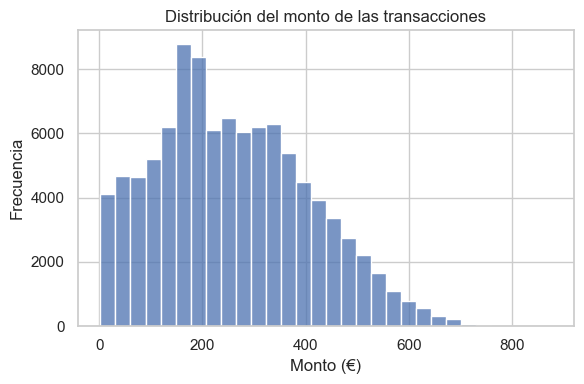

In [5]:
#Una variable numérica: histograma de amount
plt.figure(figsize=(6,4))
sns.histplot(df_transaction['amount'].dropna(), bins=30)
plt.title("Distribución del monto de las transacciones")
plt.xlabel("Monto (€)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Interpretación 1a:
La mayoría de las transacciones son de montos bajos, situandose la moda entre 150 y 200€. Hay valores atípicos más altos (+600€),
por lo que la distribución tiene un sesgo positivo (cola a la derecha).

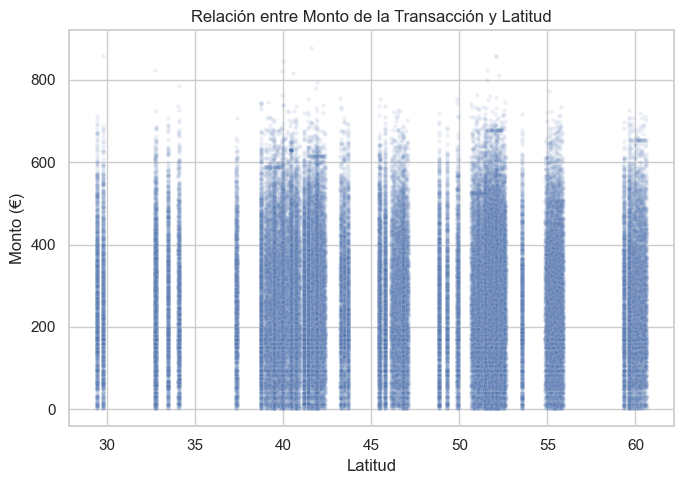

In [6]:
# 2. Dos variables numéricas: monto vs. latitud
plt.figure(figsize=(7,5))

sns.scatterplot(data=df_transaction, x='lat', y='amount', alpha=0.1, s=10) 

plt.title("Relación entre Monto de la Transacción y Latitud")
plt.xlabel("Latitud")
plt.ylabel("Monto (€)")
plt.tight_layout()
plt.show()

Interpretación 2a:
No existe una correlación lineal evidente entre latitud y el monto de la transacción; por lo que estar más al norte o al sur del mundo
no refleja que los usuarios gasten más o menos. En todas las bandas o grupos de latitud (las bandas representan transacciones agrupadas en latitudes especificas, como el norte de Europa) la distribución es similar.

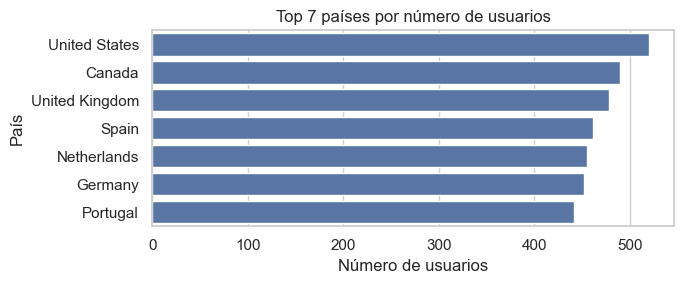

In [7]:
# 6.3 Una variable categórica: usuarios por país
plt.figure(figsize=(7,3))
sns.barplot(x=top_7_countries_list.values, y=top_7_countries_list.index)
plt.title("Top 7 países por número de usuarios")
plt.xlabel("Número de usuarios")
plt.ylabel("País")
plt.tight_layout()
plt.show()

Interpretación 3a:
Entre los 7 paises con más usuarios se destacan USA, Canadá y UK; siendo USA relativamente mayor al resto. Los demás paises rondan los 450 usuarios.

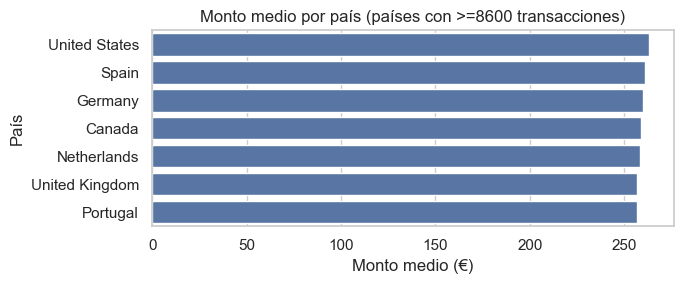

In [8]:
# 6.4 Categórica + numérica: monto medio por país
tx_by_country_top = tx_by_country[tx_by_country['count']>=8600].nlargest(15, 'mean')  # filtrar países con >=8500 transacciones
plt.figure(figsize=(7,3))
sns.barplot(data=tx_by_country_top, x='mean', y='country')
plt.title("Monto medio por país (países con >=8600 transacciones)")
plt.xlabel("Monto medio (€)")
plt.ylabel("País")
plt.tight_layout()
plt.show()

Interpretación 4a:
Se ve claramente una consistencia del monto medio. Todos los paises tienen diferencias geográficas, culturales, número de usuarios y ventas; pero las transacciones en todos producen un monto promedio en torno a los 250€.

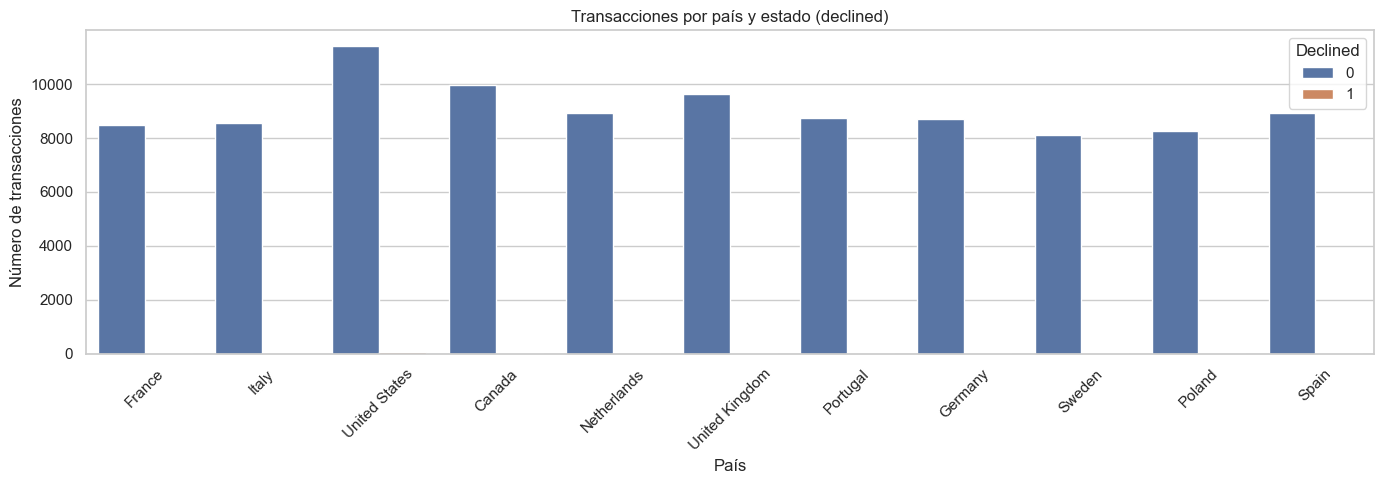

In [9]:
# 6.5 Dos variables categóricas: declined vs country
plt.figure(figsize=(14,5))
sns.countplot(data=df_tx_user, x='country', hue=df_tx_user['declined'].astype(str))
plt.title("Transacciones por país y estado (declined)")
plt.xlabel("País")
plt.ylabel("Número de transacciones")
plt.xticks(rotation=45)
plt.legend(title='Declined')
plt.tight_layout()
plt.show()

Interpretación 4a:
El ratio de transacciones declinadas sobre aprobadas es íncimo; lo cuales bueno. Podemos comprobar también que USA es el país con mayor
número de transacciones (≈11000).

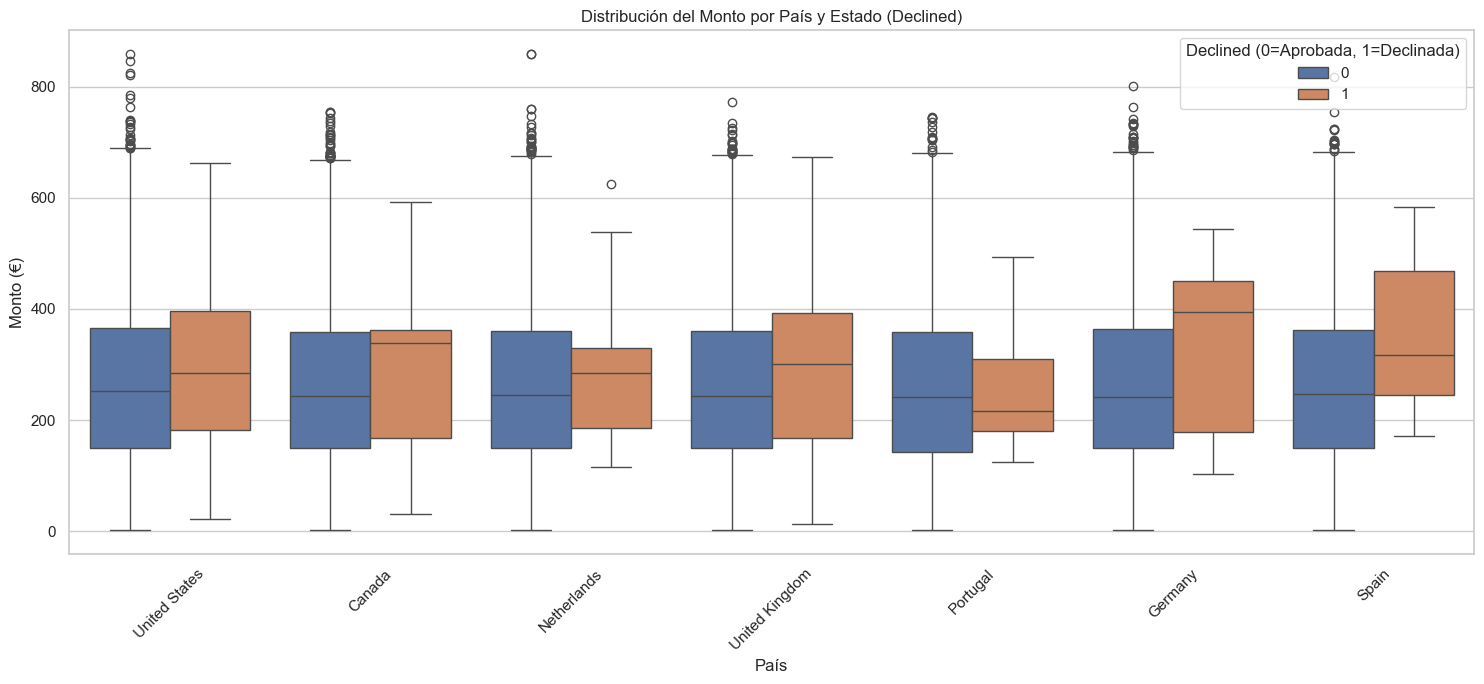

In [10]:
# 6. Tres variables: monto vs país vs estado (declined)
plt.figure(figsize=(15, 7))

sns.boxplot(data=df_tx_user_top7, x='country', y='amount', hue=df_tx_user_top7['declined'])

plt.title("Distribución del Monto por País y Estado (Declined)")
plt.xlabel("País")
plt.ylabel("Monto (€)")
plt.xticks(rotation=45)
plt.legend(title='Declined (0=Aprobada, 1=Declinada)')
plt.tight_layout()
plt.show()

Interpretación 5a:
Como vimos en la 3a visualización, el monto de las transacciones aprobadas es muy consistente; en azul. Sin embargo, las transacciones declinadas, en naranja, tienden a tener montos más variables y significativamente más altos. Los montos elevados son un factor de riesgo para la viabilidad de la transacción, que podrían indicar alertas de fraude o falta de fondos por parte de los usuarios.

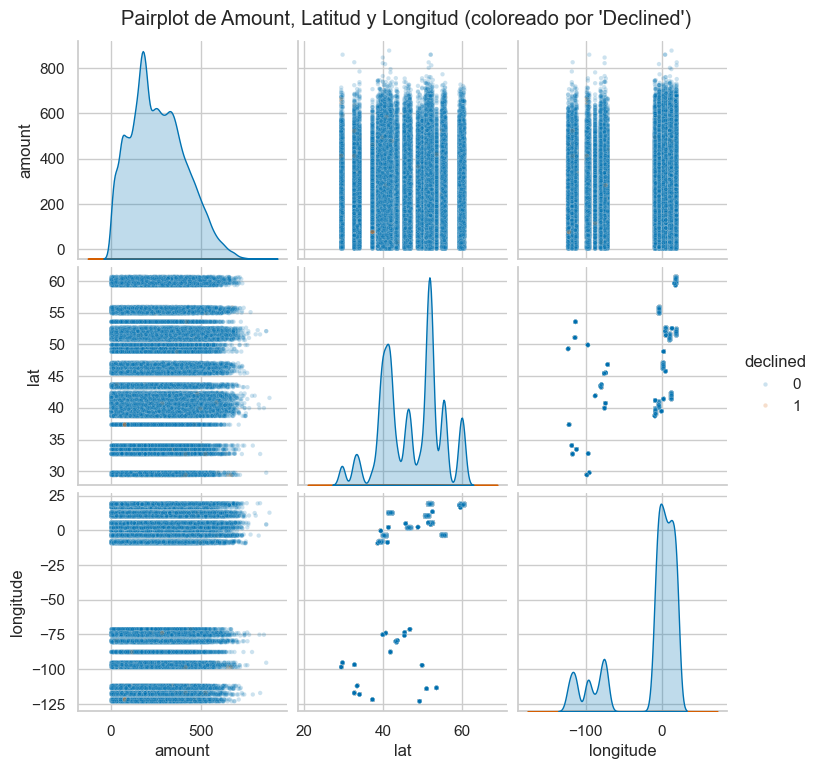

In [11]:
# 7. Pairplot

# variables de interés de df_transaction
df_pairplot = df_transaction[['amount', 'lat', 'longitude', 'declined']].copy()

# convertir 'declined' a string para que seaborn lo trate como categórico en el 'hue'
df_pairplot['declined'] = df_pairplot['declined'].astype(str)

# Creamos el pairplot
# 'declined' como 'hue' para diferenciar transacciones
# plot_kws para reducir el tamaño del punto y añadir transparencia
sns.pairplot(df_pairplot, 
             hue='declined', 
             palette={'0': '#0072B2', '1': '#D55E00'},
             plot_kws={'alpha': 0.2, 's': 10})

plt.suptitle("Pairplot de Amount, Latitud y Longitud (coloreado por 'Declined')", y=1.02)
plt.show()

Interpretación 7a:
Histogramas:
Se confirma que el amount está sesgado (la mayoría son bajos), y que latitud y longitud están agrupados en picos (ciudades y regiones).

latitud vs. longitud:
Se muestran los 'puntos calientes' geográficos donde ocurren las transacciones.

Análisis del color:
Geográficamente (latitud vs. longitud), los puntos naranjas (declinados) están mezclados con los azules (aprobados). No hay una "ciudad" específica donde solo haya declinaciones (o fraudes).

En la fila del amount, la pequeña curva de distribución naranja en el histograma de amount está visiblemente desplazada hacia la izquierda (valores más bajos) en comparación con la gran curva azul.

Conclusión : El pairplot refuerza las conclusiones anteriores: la ubicación geográfica no parece ser el factor determinante para que una transacción sea declinada, pero el monto (amount) sí lo es (el gráfico amount vs amount está a escala, haciéndolo inapreciable).